In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df= pd.read_csv('mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


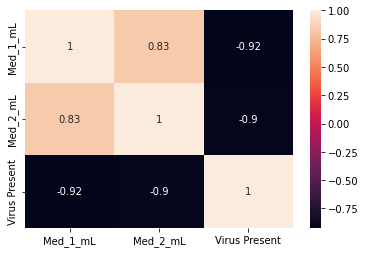

In [2]:
sns.heatmap(df.corr(),annot= True);

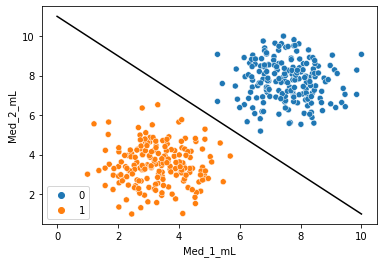

In [17]:
# plt.figure(figsize=(12,4),dpi=200);
sns.scatterplot(data = df, x='Med_1_mL',y= 'Med_2_mL' , hue = 'Virus Present' );
a= np.linspace(0,10,100)
c=11
m=-1
b = m*a + c 
plt.plot(a,b,'black');
plt.legend(loc = 'lower left');

In [20]:
from sklearn.svm import SVC 
y= df['Virus Present']
X = df.drop('Virus Present',axis = 1)
model = SVC(kernel='linear',C = 1000)
model.fit(X,y)

SVC(C=1000, kernel='linear')

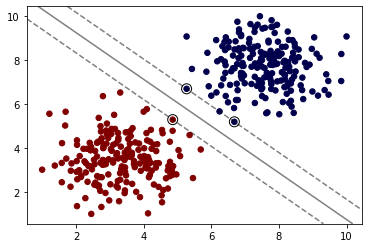

In [22]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,X,y)

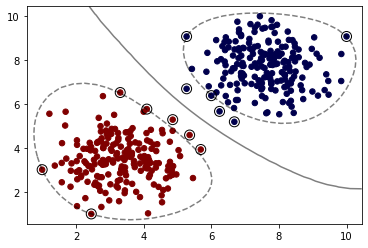

In [25]:
model = SVC(kernel='rbf',C = 1, gamma = 'scale') # gamma = 'auto'
model.fit(X,y)
plot_svm_boundary(model,X,y)

In [26]:
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10,100], 'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']})

In [27]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}